In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer


In [ ]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')

In [ ]:
df.head()

In [ ]:
selected_columns=['credit_score','gender','age','tenure','products_number','credit_card','active_member','estimated_salary','churn']
df=df[selected_columns]
x=df.drop('churn',axis=1)
y=df['churn']

In [124]:
df.isnull().sum()

credit_score        0
gender              0
age                 0
tenure              0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [125]:
catagorical_columns=['gender','tenure','products_number','credit_card','active_member']
numerical_columns=["credit_score",'age','estimated_salary']

In [126]:
encoder=OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(x[catagorical_columns])
feature_names=encoder.get_feature_names_out(catagorical_columns)
encoded_dataframe=pd.DataFrame(encoded_data,columns=feature_names)
encoded_dataframe.head()

,gender_Female,gender_Male,tenure_0,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,tenure_9,tenure_10,products_number_1,products_number_2,products_number_3,products_number_4,credit_card_0,credit_card_1,active_member_0,active_member_1
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [127]:
scaler=StandardScaler()
x[numerical_columns]=scaler.fit_transform(x[numerical_columns])
x_scaled=x.copy()[numerical_columns]

In [ ]:
x_scaled.head()

x_new=x_scaled[numerical_columns]
print(x_new)
df_merged=pd.concat([encoded_dataframe,x_scaled],axis=1)
df_merged.head()                    

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_merged,y,test_size=0.25,random_state=0)

In [133]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [134]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [138]:
comparison_df=pd.DataFrame({'Actual':y_test,'Predicited':y_pred})
comparison_df.head()

,Actual,Predicited
9394,0,0
898,1,1
2398,0,0
5906,0,0
2343,0,0


In [141]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,y_pred)
print(conf)

[[1922   69]
 [ 312  197]]


<Axes: >

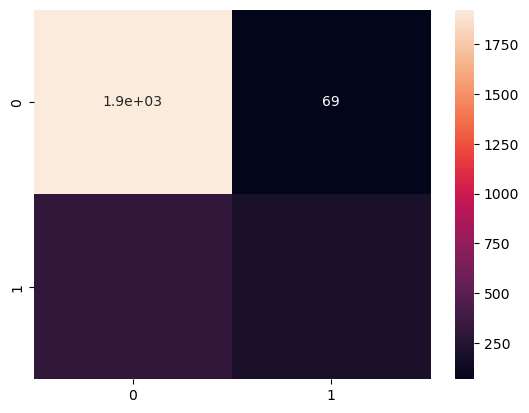

In [144]:
sns.heatmap(conf,annot=True)

In [145]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8476


In [146]:
TN=conf[0][0]
FP=conf[0][1]
FN=conf[1][0]
TP=conf[1][1]

In [147]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print('accuracy :',accuracy)

accuracy : 0.8476


In [148]:
recall=TP/(TP+FP)
print('recall : ',recall)

recall :  0.7406015037593985


In [149]:
recall=TP/(TP+FP)
print('recall : ',recall)

recall :  0.7406015037593985


In [150]:
recall=TP/(TP+FP)
print('recall : ',recall)

recall :  0.7406015037593985
